In [ ]:
import nltk
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

import seaborn as sb
from nltk.corpus import stopwords
nltk.download('stopwords')
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.stem import PorterStemmer
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import matplotlib.animation as animation
import operator
import plotly.express as px
from collections import Counter
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
ld = pd.read_csv ('/content/labeled_data.csv')

ld

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [ ]:
!pip install tensorflow


In [ ]:
ld['clean_tweet'] = ld['tweet'].apply(lambda x : ' '.join([tweet for tweet in x.split()if not tweet.startswith("@")]))
ld['clean_tweet'] = ld['clean_tweet'].apply(lambda x : ' '.join([tweet for tweet in x.split() if not tweet == 'RT']))

In [ ]:

ld['clean_tweet'] = ld['clean_tweet'].apply(lambda x : ' '.join([tweet for tweet in x.split()if not tweet.startswith("!")]))
ld.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,clean_tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,As a woman you shouldn't complain about cleani...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,boy dats cold...tyga dwn bad for cuffin dat ho...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Dawg!!!! You ever fuck a bitch and she start t...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,she look like a tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,The shit you hear about me might be true or it...


In [ ]:
reformed

'I love myself'

In [ ]:
ld['clean_tweet'] = ld['clean_tweet'].apply(lambda x : ' '.join(d[word] if word in d else word for word in x.split()))
d['#'] = ld['clean_tweet'].apply(lambda x : ' '.join([word for word in x.split() if word.startswith('#')]))

In [ ]:
ld.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,clean_tweet,#
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,As a woman you shouldn't complain about cleani...,
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,boy that is cold...tyga dwn bad for cuffin dat...,
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Dawg!!!! You ever fuck a bitch and she start t...,
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,she look like a tranny,
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,The shit you hear about me might be true or it...,


In [ ]:
ld['#']

0         
1         
2         
3         
4         
        ..
24778     
24779     
24780     
24781     
24782     
Name: #, Length: 24783, dtype: object

In [ ]:
frame = ld['#']
type(frame)
frame = pd.DataFrame(frame)
frame = frame.rename({'#':'Count(#)'},axis = 'columns')


In [ ]:
#removes the h(m) from tweets
ld['clean_tweet'] = ld['clean_tweet'].apply(lambda x : ' '.join([word for word in x.split() if not word == 'h(m)+' ]))

In [ ]:
d = {'luv':'love','wud':'would','lyk':'like','wateva':'whatever','ttyl':'talk to you later',
               'kul':'cool','fyn':'fine','omg':'oh my god!','fam':'family','bruh':'brother',
               'cud':'could','fud':'food','dats':'that is'} ## Need a huge dictionary
words = "I luv myself"
words = words.split()
reformed = [d[word] if word in d else word for word in words]
reformed = " ".join(reformed)

In [ ]:
ld['clean_tweet'] = ld['clean_tweet'].apply(lambda x : ' '.join(d[word] if word in d else word for word in x.split()))

In [ ]:
ld['#']
frame = ld['#']
frame.head(50)
type(frame)
frame = pd.DataFrame(frame)

frame = frame.rename({'#':'Count(#)'},axis = 'columns')
frame.head(50)

,Count(#)
0,
1,
2,
3,
4,
5,
6,
7,
8,
9,


In [ ]:
frame[frame['Count(#)'] == ''] = 'No hashtags'
frame.head(50)

,Count(#)
0,No hashtags
1,No hashtags
2,No hashtags
3,No hashtags
4,No hashtags
5,No hashtags
6,No hashtags
7,No hashtags
8,No hashtags
9,No hashtags


In [ ]:
ld.head(50)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,clean_tweet,#
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,As a woman you shouldn't complain about cleani...,
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,boy that is cold...tyga dwn bad for cuffin dat...,
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Dawg!!!! You ever fuck a bitch and she start t...,
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,she look like a tranny,
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,The shit you hear about me might be true or it...,
5,5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just...",The shit just blows me..claim you so faithful ...,
6,6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up ...",I can not just sit up and HATE on another bitc...,
7,7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...,cause I'm tired of you big bitches coming for ...,
8,8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; ...",""" &amp; you might not get ya bitch back &amp; ...",
9,9,3,1,2,0,1,""" @rhythmixx_ :hobbies include: fighting Maria...",""" :hobbies include: fighting Mariam"" bitch",


In [ ]:
data_frame = pd.concat([ld,frame],axis = 1)
data_frame.head(50)
data_frame.drop('#',axis = 1,inplace = True)
data_frame.head(50)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,clean_tweet,Count(#)
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,As a woman you shouldn't complain about cleani...,No hashtags
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,boy that is cold...tyga dwn bad for cuffin dat...,No hashtags
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Dawg!!!! You ever fuck a bitch and she start t...,No hashtags
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,she look like a tranny,No hashtags
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,The shit you hear about me might be true or it...,No hashtags
5,5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just...",The shit just blows me..claim you so faithful ...,No hashtags
6,6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up ...",I can not just sit up and HATE on another bitc...,No hashtags
7,7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...,cause I'm tired of you big bitches coming for ...,No hashtags
8,8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; ...",""" &amp; you might not get ya bitch back &amp; ...",No hashtags
9,9,3,1,2,0,1,""" @rhythmixx_ :hobbies include: fighting Maria...",""" :hobbies include: fighting Mariam"" bitch",No hashtags


In [ ]:
data_frame = data_frame.rename({'Count(#)':'Hash words'},axis = 'columns')
data_frame.head(50)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,clean_tweet,Hash words
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,As a woman you shouldn't complain about cleani...,No hashtags
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,boy that is cold...tyga dwn bad for cuffin dat...,No hashtags
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Dawg!!!! You ever fuck a bitch and she start t...,No hashtags
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,she look like a tranny,No hashtags
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,The shit you hear about me might be true or it...,No hashtags
5,5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just...",The shit just blows me..claim you so faithful ...,No hashtags
6,6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up ...",I can not just sit up and HATE on another bitc...,No hashtags
7,7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...,cause I'm tired of you big bitches coming for ...,No hashtags
8,8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; ...",""" &amp; you might not get ya bitch back &amp; ...",No hashtags
9,9,3,1,2,0,1,""" @rhythmixx_ :hobbies include: fighting Maria...",""" :hobbies include: fighting Mariam"" bitch",No hashtags


In [ ]:
data_frame['clean_tweet'] = data_frame['clean_tweet'].apply(lambda x : ' '.join([word for word in x.split() if not word in set(stopwords.words('english'))]))
data_frame.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,clean_tweet,Hash words
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,As woman complain cleaning house. &amp; man al...,No hashtags
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,boy cold...tyga dwn bad cuffin dat hoe 1st pla...,No hashtags
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Dawg!!!! You ever fuck bitch start cry? You co...,No hashtags
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,look like tranny,No hashtags
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,The shit hear might true might faker bitch tol...,No hashtags


In [ ]:
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer

In [ ]:
ps = PorterStemmer()
adwait = data_frame
#adwait.head()
data_frame['clean_tweet'] = data_frame['clean_tweet'].apply(lambda x : ' '.join([ps.stem(word) for word in x.split()]))

In [ ]:
data_frame['tweet']

0        !!! RT @mayasolovely: As a woman you shouldn't...
1        !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2        !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3        !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4        !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
                               ...                        
24778    you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779    you've gone and broke the wrong heart baby, an...
24780    young buck wanna eat!!.. dat nigguh like I ain...
24781                youu got wild bitches tellin you lies
24782    ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...
Name: tweet, Length: 24783, dtype: object

In [ ]:
data_frame['class']

0        2
1        1
2        1
3        1
4        1
        ..
24778    1
24779    2
24780    1
24781    1
24782    2
Name: class, Length: 24783, dtype: int64

In [ ]:
#Tokenization
corpus = []
for i in range(0,24783):
    tweet = data_frame['clean_tweet'][i]
    tweet = tweet.lower()
    tweet = tweet.split()
    #if words not in stopwords convert those into base form
    tweet = [ps.stem(word) for word in tweet if not word in set(stopwords.words('english'))]
    tweet = ' '.join(tweet)
    corpus.append(tweet)


In [ ]:

ld['#'] = ld['clean_tweet'].apply(lambda x : ' '.join([word for word in x.split() if word.startswith('#')]))

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense

# Load  preprocessed Twitter dataset
tweets_df = pd.read_csv('/content/labeled_data.csv')

# Tokenization
max_words = 10000  # Consider only the top 10,000 words
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(tweets_df['tweet'])
sequences = tokenizer.texts_to_sequences(tweets_df['tweet'])

# Padding sequences to ensure uniform length
maxlen = 100  # Length of each tweet sequence
data = pad_sequences(sequences, maxlen=maxlen)

# Labels
labels = np.asarray(tweets_df['class'])

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Model architecture
embedding_dim = 100
filters = 128
kernel_size = 5
num_classes = 3  # Number of classes

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Conv1D(filters, kernel_size, activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))  # Softmax for multi-class classification

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Sparse categorical cross-entropy for integer labels
              metrics=['accuracy'])

# Training the model
batch_size = 32
epochs = 10
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

# Prediction on a new input tweet
test_tweet = "Your are good to go"
new_tweet_sequence = tokenizer.texts_to_sequences([new_tweet])
new_tweet_sequence_padded = pad_sequences(new_tweet_sequence, maxlen=maxlen)
predicted_class_prob = model.predict(new_tweet_sequence_padded)
predicted_class = np.argmax(predicted_class_prob)
print("Predicted Class:", predicted_class)


Epoch 1/10
620/620 [==============================] - 32s 50ms/step - loss: 0.3777 - accuracy: 0.8699 - val_loss: 0.2900 - val_accuracy: 0.9007
Epoch 2/10
620/620 [==============================] - 27s 43ms/step - loss: 0.2062 - accuracy: 0.9298 - val_loss: 0.3105 - val_accuracy: 0.8973
Epoch 3/10
620/620 [==============================] - 27s 44ms/step - loss: 0.1174 - accuracy: 0.9587 - val_loss: 0.3871 - val_accuracy: 0.8866
Epoch 4/10
620/620 [==============================] - 29s 46ms/step - loss: 0.0560 - accuracy: 0.9809 - val_loss: 0.5061 - val_accuracy: 0.8804
Epoch 5/10
620/620 [==============================] - 28s 45ms/step - loss: 0.0265 - accuracy: 0.9917 - val_loss: 0.6541 - val_accuracy: 0.8804
Epoch 6/10
620/620 [==============================] - 26s 42ms/step - loss: 0.0143 - accuracy: 0.9958 - val_loss: 0.7659 - val_accuracy: 0.8804
Epoch 7/10
620/620 [==============================] - 31s 50ms/step - loss: 0.0095 - accuracy: 0.9972 - val_loss: 0.7729 - val_accuracy:

In [ ]:
test_tweet = "Your are very cruel"
new_tweet_sequence = tokenizer.texts_to_sequences([test_tweet])
new_tweet_sequence_padded = pad_sequences(new_tweet_sequence, maxlen=maxlen)
predicted_class_prob = model.predict(new_tweet_sequence_padded)
predicted_class = np.argmax(predicted_class_prob)
print("Predicted Class:", predicted_class)

1/1 [==============================] - 0s 34ms/step
Predicted Class: 0


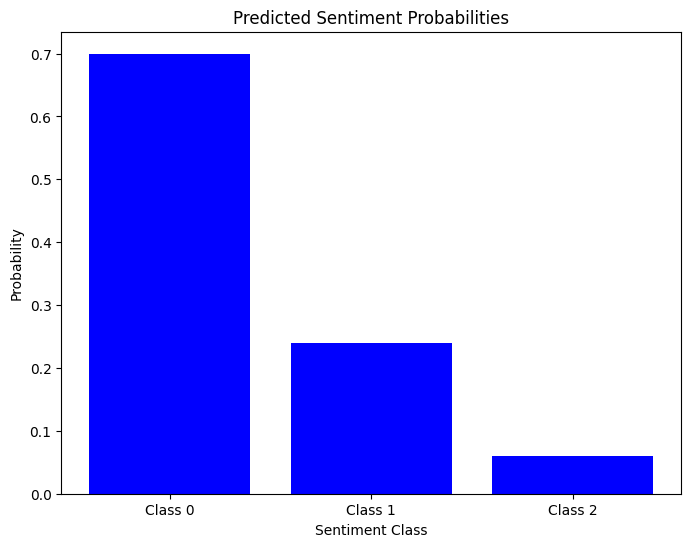

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(range(num_classes), predicted_class_prob.flatten(), color='blue')
plt.xlabel('Sentiment Class')
plt.ylabel('Probability')
plt.title('Predicted Sentiment Probabilities')
plt.xticks(range(num_classes), ['Class 0', 'Class 1', 'Class 2'])
plt.show()

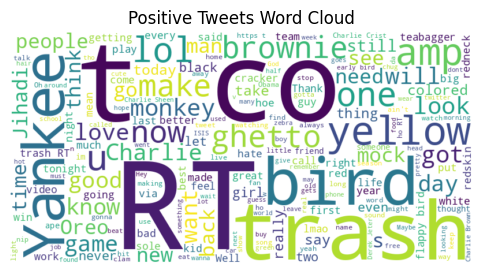

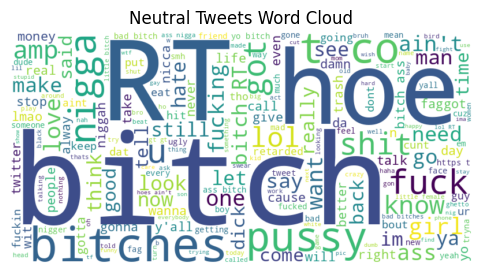

In [ ]:
tweet_texts = tweets_df['tweet']
tweet_labels = tweets_df['class']

positive_tweets = ' '.join(tweet_texts[tweet_labels == 2])
neutral_tweets = ' '.join(tweet_texts[tweet_labels == 1])
negative_tweets = ' '.join(tweet_texts[tweet_labels == 0])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets)
plt.figure(figsize=(8, 3))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Positive Tweets Word Cloud')
plt.axis('off')
plt.show()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neutral_tweets)
plt.figure(figsize=(8, 3))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Neutral Tweets Word Cloud')
plt.axis('off')
plt.show()
